## MTH452 Project 1: write python code to solve 8.1(3)

In [1]:
# Import numpy and matplotlib libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# given data 
actual_x = np.array([1.0,1.1,1.3,1.5,1.9,2.1])
actual_y = np.array([1.84,1.96,2.21,2.45,2.94,3.18])
m = len(actual_x) # number of data points

In [3]:
# getting needed infomation
x_squared = actual_x**2
x_third = actual_x**3
x_fourth = actual_x**4
x_fifth = actual_x**5
x_sixth = actual_x**6
xy = actual_x*actual_y
x2y = (actual_x**2)*actual_y
x3y = (actual_x**3)*actual_y

### Approximating the linear least squares polynomial

In [6]:
# finding P1(x)
# define matrices namely A, B corresponding to the normal equations for P1(x)
# Aa = B
A = np.matrix([[m,sum(actual_x)],
    [sum(actual_x),sum(x_squared)]])
B = np.matrix([[sum(actual_y)],[sum(xy)]])

# solving the system
a = np.linalg.solve(A, B)

# getting the coefficients
a0 = a.item(0,0)
a1 = a.item(1,0)

# define the linear squares polynomial in form of string
P1_x = str(a0)+'+'+str(a1)+'x'

In [19]:
# define P1() function for further calculations and plottings
def P1(a0,a1,x):
    P1 = []
    for i in range(len(x)):
        P1.append(a0 + a1*x[i])
    return P1

### Approximating the quadratic least squares polynomial

In [20]:
# finding P2(x)
# define matrices namely C, D corresponding to the normal equations for P2(x)
# Cb = D
C = np.matrix([[m, sum(actual_x), sum(x_squared)],
             [sum(actual_x), sum(x_squared), sum(x_third)],
             [sum(x_squared), sum(x_third), sum(x_fourth)]])
D = np.matrix([[sum(actual_y)],[sum(xy)],[sum(x2y)]])

# Solving the system
b = np.linalg.solve(C, D)

# Getting coefficients
b0 = b.item(0,0)
b1 = b.item(1,0)
b2 = b.item(2,0)

# define the quadratic squares polynomial in form of string
P2_x = str(b0)+'+'+str(b1)+'x+'+str(b2)+'x^2'

In [21]:
# define P2(x) function for further calculations and plottings
def P2(b0,b1,b2,x):
    P2 = []
    for i in range(len(x)):
        P2.append(b0 + b1*x[i] + b2*x[i]**2)
    return P2

### Approximating the cubic least squares polynomial

In [22]:
# finding P3(x)
# defining matrices corresponding to the normal equations for P3(x)
# Ec = F
E = np.matrix([[m, sum(actual_x), sum(x_squared), sum(x_third)],
             [sum(actual_x), sum(x_squared), sum(x_third), sum(x_fourth)],
             [sum(x_squared), sum(x_third), sum(x_fourth), sum(x_fifth)],
             [sum(x_third), sum(x_fourth), sum(x_fifth), sum(x_sixth)]])
F = np.matrix([[sum(actual_y)],[sum(xy)],[sum(x2y)],[sum(x3y)]])

# solving the system
c = np.linalg.solve(E, F)

# getting the coefficients
c0 = c.item(0,0)
c1 = c.item(1,0)
c2 = c.item(2,0)
c3 = c.item(3,0)

# define the cubic squares polynomial in form of string
P3_x = str(c0)+'+'+str(c1)+'x+'+str(c2)+'x^2'+str(c3)+'x^3'

In [23]:
# define P3() function for further calculations and plottings
def P3(c0,c1,c2,c3,x):
    P3 = []
    for i in range(len(x)):
        P3.append(c0 + c1*x[i] + c2*x[i]**2 + c3*x[i]**3)
    return P3

### The least squares polynomials degree 1, 2, and 3

In [24]:
print('P1(x) = ',P1_x)
print('P2(x) = ',P2_x)
print('P3(x) = ',P3_x)

P1(x) =  0.6208950086058516+1.219621342512909x
P2(x) =  0.5965807050090428+1.2532931354363153x+-0.010853432282107523x^2
P3(x) =  0.6290192776425545+1.185009795727932x+0.03533252044800744x^2-0.010047232343262283x^3


### Calculating the error for each least squares polynomial

In [25]:
P1_ = np.array(P1(a0,a1,actual_x)) # the linear least squares approximation
P2_ = np.array(P2(b0,b1,b2,actual_x)) # the quadratic least squares approximation
P3_ = np.array(P3(c0,c1,c2,c3,actual_x)) # the cubic least squares approximation

In [26]:
E1 = sum((actual_y - P1_)**2) # the error for P1
E2 = sum((actual_y - P2_)**2) # the error for P2
E3 = sum((actual_y - P3_)**2) # the error for P3

In [27]:
print('The error E1 for P1 =',E1)
print('The error E2 for P2 =',E2)
print('The error E3 for P3 =',E3)

The error E1 for P1 = 2.7194492254731844e-05
The error E2 for P2 = 1.801484230055883e-05
The error E3 for P3 = 1.7407310952222505e-05


### Plotting the results

In [29]:
x = np.linspace(0.75,2.25,num=100)
P1_plot = np.array(P1(a0,a1,x))
P2_plot = np.array(P2(b0,b1,b2,x))
P3_plot = np.array(P3(c0,c1,c2,c3,x))
#------------------------------------------------------#
x_extended = np.linspace(0.75,20,num=100)
P1_plot_extended = np.array(P1(a0,a1,x_extended))
P2_plot_extended = np.array(P2(b0,b1,b2,x_extended))
P3_plot_extended = np.array(P3(c0,c1,c2,c3,x_extended))

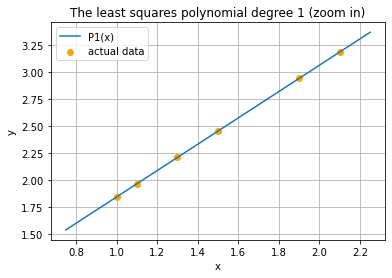

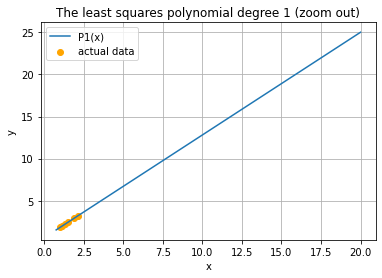

In [30]:
plt.plot(x,P1_plot,label="P1(x)")
plt.scatter(actual_x,actual_y,color='orange',label="actual data")
plt.title("The least squares polynomial degree 1 (zoom in)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

plt.plot(x_extended,P1_plot_extended,label="P1(x)")
plt.scatter(actual_x,actual_y,color='orange',label="actual data")
plt.title("The least squares polynomial degree 1 (zoom out)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

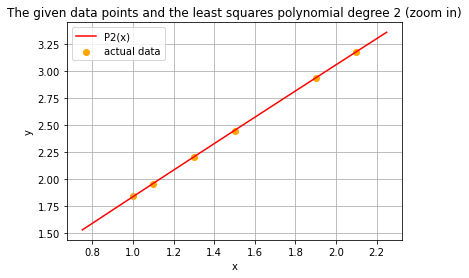

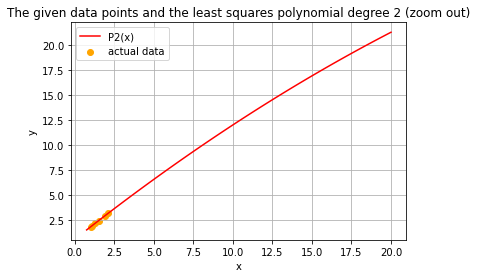

In [31]:
plt.plot(x,P2_plot,label="P2(x)",color='r')
plt.scatter(actual_x,actual_y,color='orange',label="actual data")
plt.title("The given data points and the least squares polynomial degree 2 (zoom in)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

plt.plot(x_extended,P2_plot_extended,label="P2(x)",color='r')
plt.scatter(actual_x,actual_y,color='orange',label="actual data")
plt.title("The given data points and the least squares polynomial degree 2 (zoom out)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

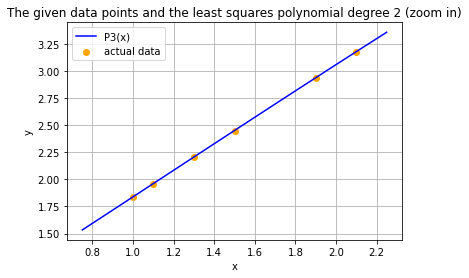

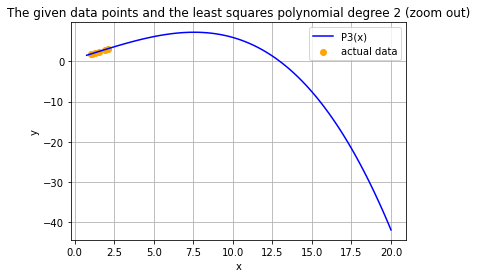

In [32]:
plt.plot(x,P3_plot,label="P3(x)",color='b')
plt.scatter(actual_x,actual_y,color='orange',label="actual data")
plt.title("The given data points and the least squares polynomial degree 2 (zoom in)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

plt.plot(x_extended,P3_plot_extended,label="P3(x)",color='b')
plt.scatter(actual_x,actual_y,color='orange',label="actual data")
plt.title("The given data points and the least squares polynomial degree 2 (zoom out)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()